Link dataset: https://www.kaggle.com/nguyenhohuunghia/fiwcodalab?select=train-faces

#Run First

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install MTCNN

     |████████████████████████████████| 2.3 MB 7.3 MB/s 


In [ ]:
path =  "/content/drive/MyDrive/Colab Notebooks/Developing AI Application/facenet/"

In [ ]:
#A face embedding is a vector that represents the features extracted from the face. This can then be compared with the vectors generated for other faces.
#For example, another vector that is close (by some measure) may be the same person, whereas another vector that is far (by some measure) may be a different person.
def get_embedding(model, face_pixels):
	face_pixels = face_pixels.astype('float32')
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	samples = np.expand_dims(face_pixels, axis=0)
	yhat = model.predict(samples)
	return yhat[0]

#create a function to load data and transfer data into matrix  
def load_faces(train_folder = path+"Huy"):
    if os.path.exists("faces_data.npz"):
        data = np.load('faces_data.npz')
        X_train,y_train = data["arr_0"],data["arr_1"]
        return X_train, y_train
    else:
        X_train = []
        y_train = []

        for folder in listdir(train_folder):
            for file in listdir(train_folder +"/" + folder):
                # Read file
                image = Image.open(train_folder +"/" + folder + "/" + file)
                # convert to RGB, if needed
                image = image.convert('RGB')
                # convert to array
                pixels = np.asarray(image)

              
                X_train.append(pixels)
                y_train.append(folder)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Check dữ liệu
        print(X_train.shape)
        print(y_train.shape)
        print(y_train[0:5])

        output_enc = LabelEncoder()
        output_enc.fit(y_train)
        y_train = output_enc.transform(y_train)
        pkl_filename = "output_enc.pkl"
        with open(pkl_filename, 'wb') as file:
            pickle.dump(output_enc, file)

        print(y_train[0:5])

        X_train_emb = []
        for x in X_train:
            X_train_emb.append( get_embedding(facenet_model, x))

        X_train_emb = np.array(X_train_emb)

        print("Load faces done!")
        # Save
        np.savez_compressed('faces_data.npz', X_train_emb, y_train);
        return X_train_emb, y_train

In [ ]:
from keras.models import load_model

In [ ]:
#load model
facenet_model = load_model(path+"facenet_keras.h5")

In [ ]:
from os import listdir
import os
import numpy as np
from os.path import isdir
from PIL import Image
import pickle

from glob import glob
import shutil
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
def get_embedding(model, face_pixels):
	face_pixels = face_pixels.astype('float32')
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	samples = np.expand_dims(face_pixels, axis=0)
	yhat = model.predict(samples)
	return yhat[0]

In [ ]:
#load data
X, y = load_faces()

(656, 160, 160, 3)
(656,)
['Phuc' 'Phuc' 'Phuc' 'Phuc' 'Phuc']
[23 23 23 23 23]
Load faces done!


In [ ]:
X.shape

(656, 128)

In [ ]:
y.shape

(656,)

#splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(524, 128)

In [ ]:
y_train

In [ ]:
X_test.shape

(132, 128)

In [ ]:
y_test

array([15, 28, 29, 10, 20,  7, 25, 21, 11, 25, 14, 29, 20,  8,  7, 10, 11,
        7, 16, 12,  5, 11, 20,  0, 18, 18, 11, 18, 12, 11, 26, 23, 26, 28,
        3, 23,  0,  1, 15, 29,  8,  8, 24, 25, 11,  4, 22, 24, 24, 17, 19,
       11,  1, 23, 28, 11, 24, 25, 11, 16, 28,  9, 24, 27, 23, 16,  8, 23,
        1, 14, 20,  2,  8,  2,  1, 11, 22, 23,  1, 16, 23, 16,  8, 23, 21,
       27, 22, 17, 21,  9, 24, 11,  1, 10, 27,  8, 12, 27, 23, 15, 12, 11,
        7,  8, 28, 21, 12,  9, 23, 24, 16, 13,  0, 29, 11, 10, 14, 11, 20,
       11,  1, 19, 21,  4, 11,  4, 24,  0, 23, 19,  6,  9])

#Modeling

In [ ]:
# Train SVM với kernel 
model = SVC(kernel='linear',probability=True)
model.fit(X_train, y_train)

# Save model
pkl_filename = "faces_svm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

print("Saved model")

Saved model


In [ ]:
# Load SVM model từ file
pkl_filename = path+'faces_svm.pkl'
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pkl_filename = path+'output_enc.pkl'
with open(pkl_filename, 'rb') as file:
    output_enc = pickle.load(file)

In [ ]:
!pip install MTCNN

In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
dest_size = (160, 160)

In [56]:
from google.colab.patches import cv2_imshow

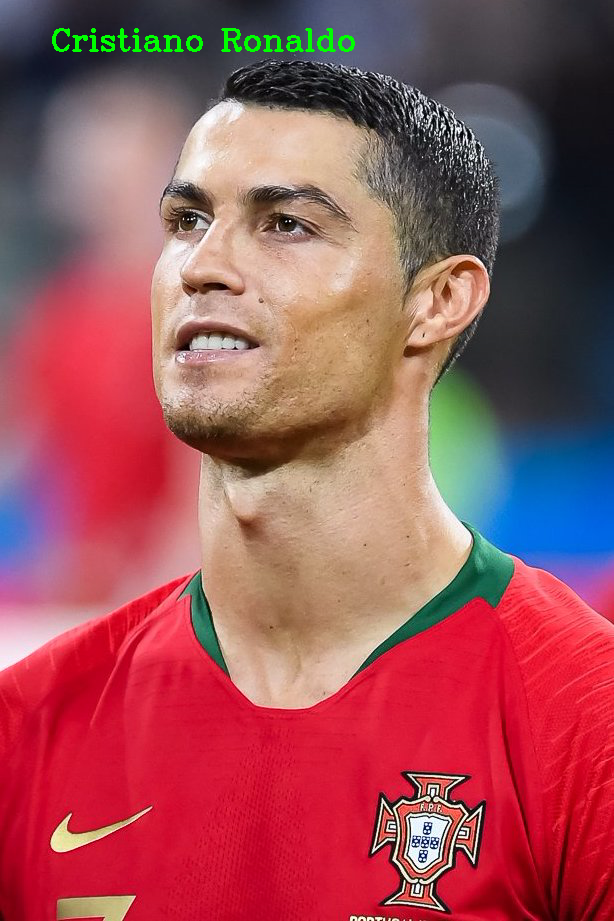

In [63]:
cap = cv2.VideoCapture(path+'c.jpg')

while(True):

    ret, frame = cap.read()
    if not ret:
        break

    pixels = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect khuôn mặt
    results = detector.detect_faces(pixels)

    if len(results) > 0:
        x1, y1, width, height = results[0]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize(dest_size)

        # Lây face embeding
        face_emb =  get_embedding(facenet_model, np.array(image))
        # Chuyển thành tensor
        face_emb = np.expand_dims(face_emb, axis=0)
        # Predict qua SVM
        y_hat = pickle_model.predict(face_emb)

        # Lấy nhãn và viết lên ảnh
        predict_names = output_enc.inverse_transform(y_hat)
        if predict_names!=None:
            cv2.putText(frame,predict_names[0],(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

#Evaluation of SVM model

accuracy

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score_train = accuracy_score(y_train, yhat_train)
print('training accuracy: ', score_train)

training accuracy:  1.0


In [ ]:
score_test = accuracy_score(y_test, yhat_test)
print('testing accuracy: ', score_test)

testing accuracy:  0.9621212121212122


precision, recall and f1-score

https://caihuuthuc.wordpress.com/2020/02/23/precision-recall-va-f1-score-la-gi/?fbclid=IwAR0AWpmFGH9a2iKQFwHaMOb47VcUEER-55Z03wvl7DltGRpvofSYeSP5VOg

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      0.88      0.93         8
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        16
          12       1.00      0.60      0.75         5
          13       1.00      1.00      1.00         1
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86         6
          17       1.00    

confusion matrix

In [ ]:
# Creation of confusion matrix in using sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, yhat_test)

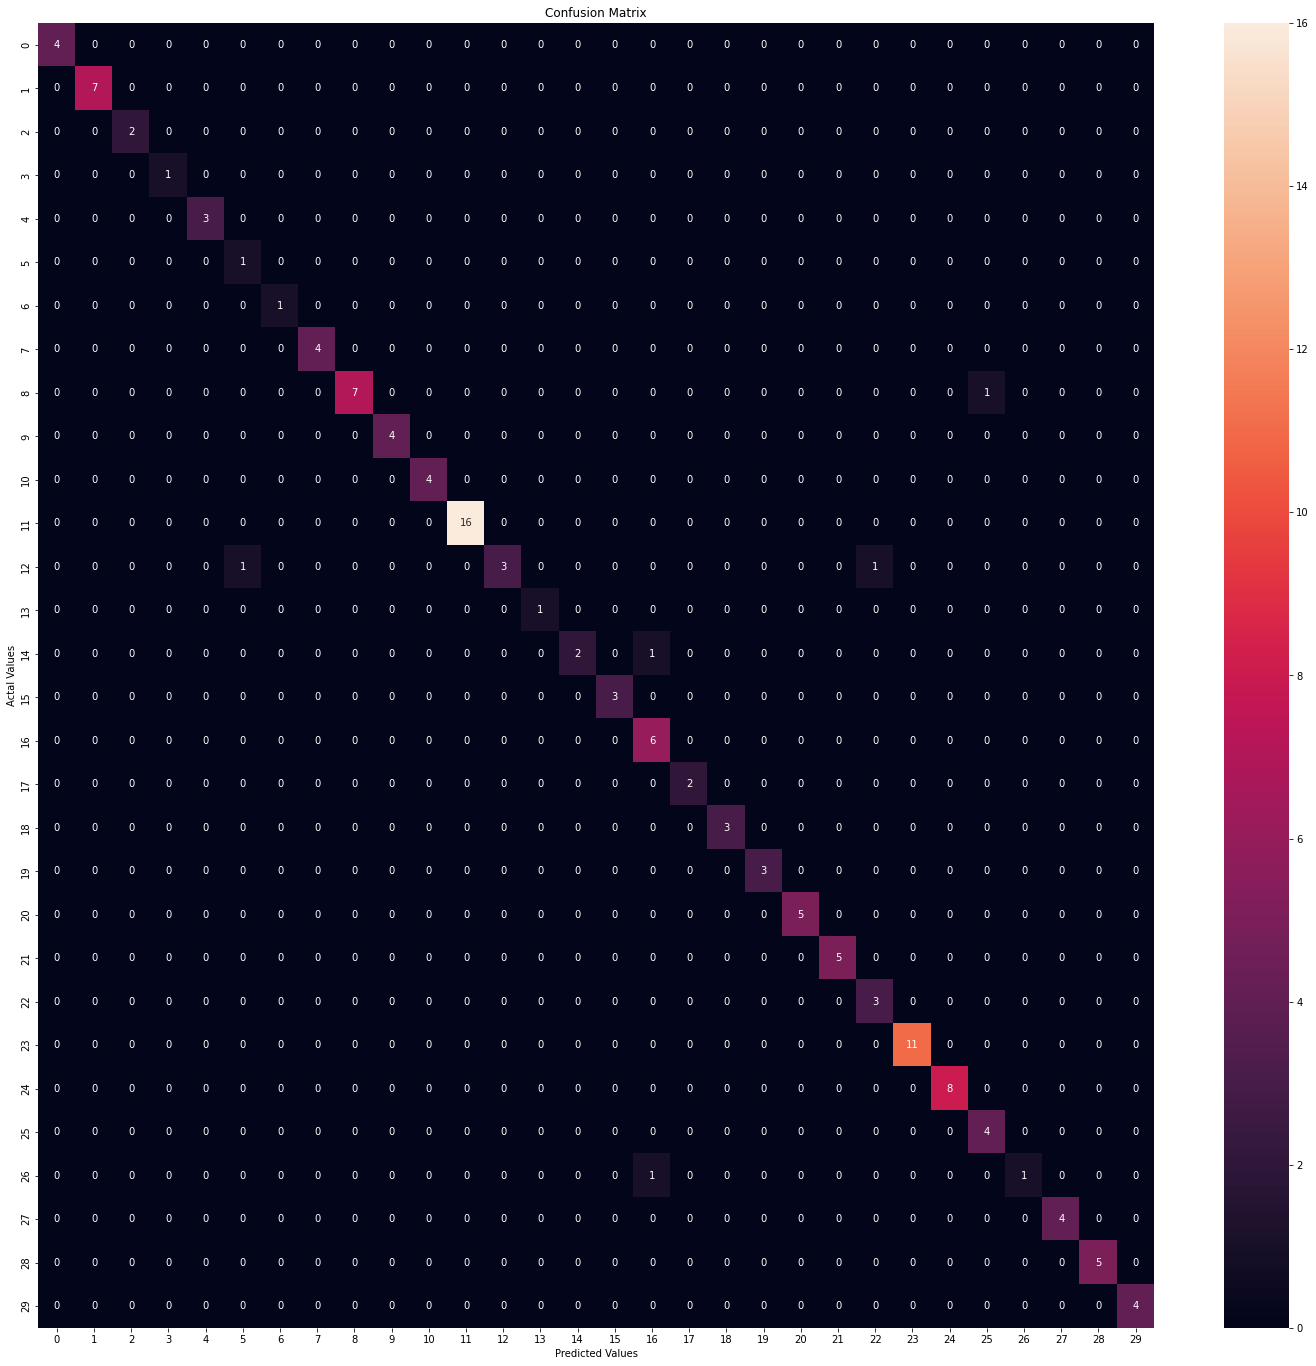

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(25,24))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#face detection using CNN

#import libraries

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
path =  "/content/drive/MyDrive/Colab Notebooks/Developing AI Application/facenet/"

In [ ]:
#A face embedding is a vector that represents the features extracted from the face. This can then be compared with the vectors generated for other faces.
#For example, another vector that is close (by some measure) may be the same person, whereas another vector that is far (by some measure) may be a different person.
def get_embedding(model, face_pixels):
	face_pixels = face_pixels.astype('float32')
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	samples = np.expand_dims(face_pixels, axis=0)
	yhat = model.predict(samples)
	return yhat[0]

#create a function to load data and transfer data into matrix  
def load_faces(train_folder = path+"Huy"):
    if os.path.exists("faces_data.npz"):
        data = np.load('faces_data.npz')
        X_train,y_train = data["arr_0"],data["arr_1"]
        return X_train, y_train
    else:
        X_train = []
        y_train = []

        for folder in listdir(train_folder):
            for file in listdir(train_folder +"/" + folder):
                # Read file
                image = Image.open(train_folder +"/" + folder + "/" + file)
                # convert to RGB, if needed
                image = image.convert('RGB')
                # convert to array
                pixels = np.asarray(image)

              
                X_train.append(pixels)
                y_train.append(folder)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Check dữ liệu
        print(X_train.shape)
        print(y_train.shape)
        print(y_train[0:5])

        output_enc = LabelEncoder()
        output_enc.fit(y_train)
        y_train = output_enc.transform(y_train)
        pkl_filename = "cnn_output_enc.pkl"
        with open(pkl_filename, 'wb') as file:
            pickle.dump(output_enc, file)

        print(y_train[0:5])
        print("Load faces done!")
        return X_train, y_train

In [ ]:
from keras.models import load_model

In [ ]:
#load model
facenet_model = load_model(path+"facenet_keras.h5")

In [ ]:
from os import listdir
import os
import numpy as np
from os.path import isdir
from PIL import Image
import pickle

from glob import glob
import shutil
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
#load data
X, y = load_faces()

(656, 160, 160, 3)
(656,)
['Phuc' 'Phuc' 'Phuc' 'Phuc' 'Phuc']
[23 23 23 23 23]
Load faces done!


In [ ]:
X.shape

(656, 160, 160, 3)

#splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(524, 160, 160, 3)

In [ ]:
y_train

In [ ]:
X_test.shape

(132, 160, 160, 3)

In [ ]:
y_test

array([15, 28, 29, 10, 20,  7, 25, 21, 11, 25, 14, 29, 20,  8,  7, 10, 11,
        7, 16, 12,  5, 11, 20,  0, 18, 18, 11, 18, 12, 11, 26, 23, 26, 28,
        3, 23,  0,  1, 15, 29,  8,  8, 24, 25, 11,  4, 22, 24, 24, 17, 19,
       11,  1, 23, 28, 11, 24, 25, 11, 16, 28,  9, 24, 27, 23, 16,  8, 23,
        1, 14, 20,  2,  8,  2,  1, 11, 22, 23,  1, 16, 23, 16,  8, 23, 21,
       27, 22, 17, 21,  9, 24, 11,  1, 10, 27,  8, 12, 27, 23, 15, 12, 11,
        7,  8, 28, 21, 12,  9, 23, 24, 16, 13,  0, 29, 11, 10, 14, 11, 20,
       11,  1, 19, 21,  4, 11,  4, 24,  0, 23, 19,  6,  9])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

train_x = tf.keras.utils.normalize(X_train,axis=1)
test_x = tf.keras.utils.normalize(X_test, axis=1)

#Modeling

In [ ]:
#model = tf.keras.models.Sequential([
            #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
                            #input_shape= X.shape[1:]),
            #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            #tf.keras.layers.MaxPooling2D(2,2),
            #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            #tf.keras.layers.MaxPooling2D(2,2),
            #tf.keras.layers.Dropout(0.25),
            #tf.keras.layers.Flatten(),
            #tf.keras.layers.Dense(128, activation=tf.nn.relu),
            #tf.keras.layers.Dense(30, activation=tf.nn.softmax)

#])

#model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

#hist = model.fit(X_train,y_train, batch_size=20, epochs = 5)

In [ ]:
# Save model
#import pickle
#pkl_filename = "faces_cnn.pkl"
#with open(pkl_filename, 'wb') as file:
    #pickle.dump(hist, file)

#print("Saved model")

In [ ]:
# load model
import pickle
pkl_filename = path+'faces_cnn.pkl'
with open(pkl_filename, 'rb') as file:
    hist = pickle.load(file)

#Evaluation of CNN model

In [ ]:
predictions = prediction = hist.model.predict(X_test) 

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

#rounded_predictions
for i in rounded_predictions[:10]:
    print(i)

22
4
29
25
20
5
3
21
11
27


loss, accuracy

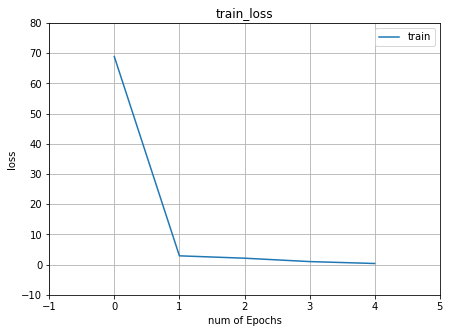

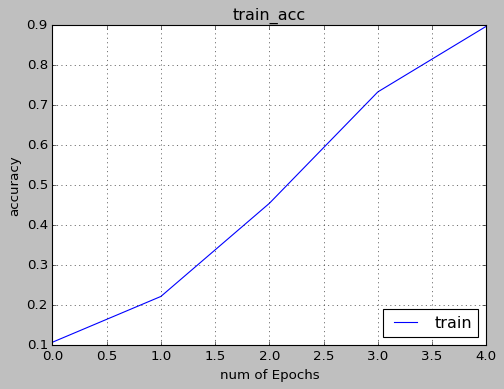

In [ ]:
epochs = 5
train_loss = hist.history['loss']
#val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
val_loss, val_acc = hist.model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

5/5 [==============================] - 6s 1s/step - loss: 4.0991 - accuracy: 0.3636
4.099121570587158
0.3636363744735718


precision, recall, f1-score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rounded_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.20      1.00      0.33         1
           7       0.25      0.25      0.25         4
           8       0.33      0.12      0.18         8
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         4
          11       1.00      1.00      1.00        16
          12       0.25      0.20      0.22         5
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       1.00      0.33      0.50         6
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix

In [ ]:
# Creation of confusion matrix in using sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, rounded_predictions)

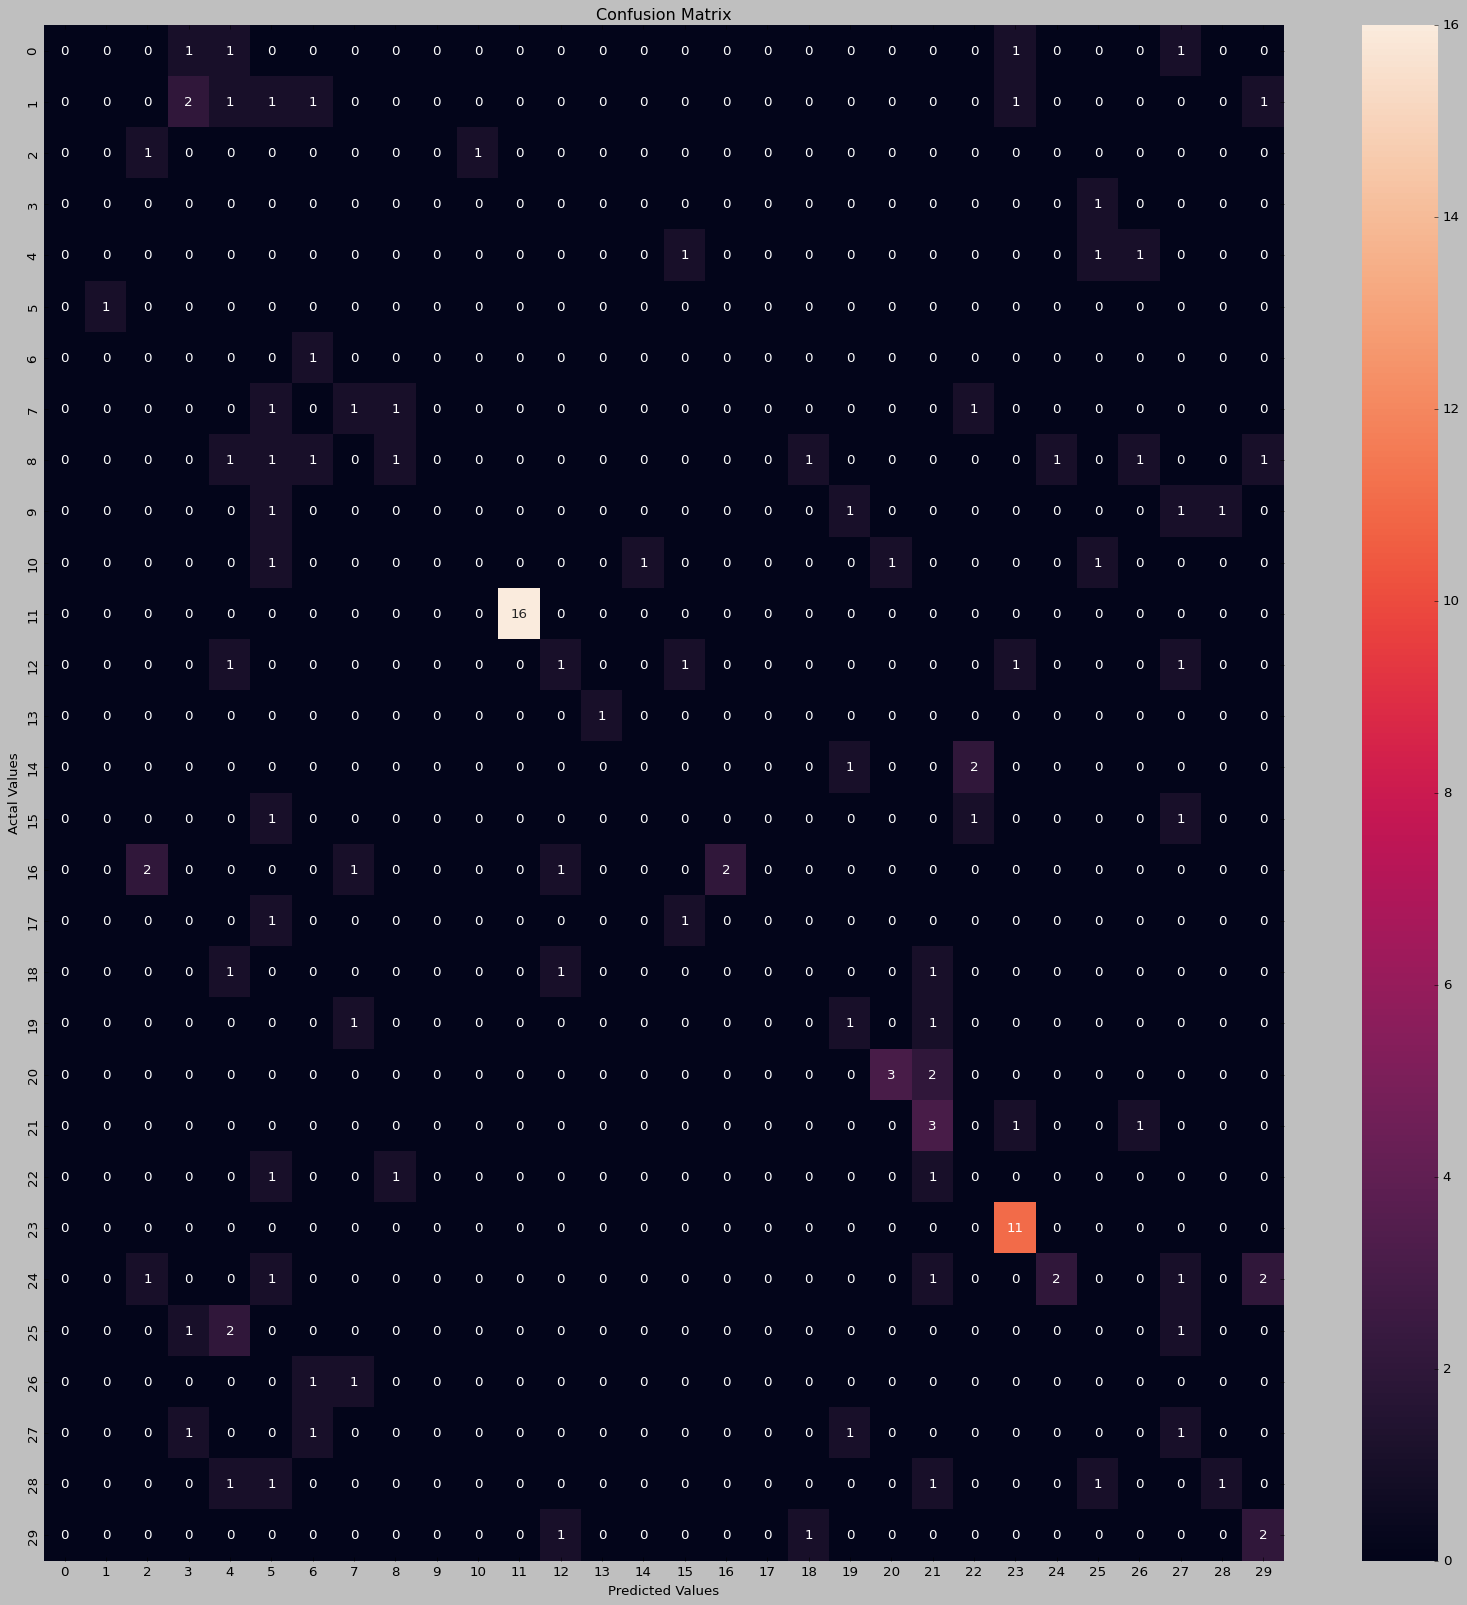

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(25,24))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

###Web

In [ ]:
def solve(img_path):
  cap = cv2.VideoCapture(path+img_path)

  while(True):

      ret, frame = cap.read()
      if not ret:
          break

      pixels = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      # Detect khuôn mặt
      results = detector.detect_faces(pixels)

      if len(results) > 0:
          x1, y1, width, height = results[0]['box']
          x1, y1 = abs(x1), abs(y1)
          x2, y2 = x1 + width, y1 + height
          face = pixels[y1:y2, x1:x2]
          image = Image.fromarray(face)
          image = image.resize(dest_size)

          # Lây face embeding
          face_emb =  get_embedding(facenet_model, np.array(image))
          # Chuyển thành tensor
          face_emb = np.expand_dims(face_emb, axis=0)
          # Predict qua SVM
          y_hat = pickle_model.predict(face_emb)

          # Lấy nhãn và viết lên ảnh
          predict_names = output_enc.inverse_transform(y_hat)
          #if predict_names!=None:
              #cv2.putText(frame,predict_names[0],(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

          return predict_names[0]

      #cv2_imshow(frame)
      #if cv2.waitKey(1) & 0xFF == ord('q'):
          #break



In [ ]:
solve('c.jpg')

'Cristiano Ronaldo'

In [ ]:
!pip install flask_ngrok

In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   
              

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 https://ngrok-agent.s3.amazonaws.com buster InReleas

In [ ]:
!ngrok authtoken 22fTeG2TZuL8DYrnlkin1Go3hn7_vFWWUNWP8kKjQn4oaUs9

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
from keras.models import load_model
from keras.preprocessing import image

app  = Flask(__name__, template_folder=path + "/templates/" )
run_with_ngrok(app)


# routes
@app.route("/", methods=['GET', 'POST'])
def main():
	return render_template("index.html")

@app.route("/about")
def about_page():
	return "Please subscribe  Artificial Intelligence Hub..!!!"

@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
	if request.method == 'POST':
		img = request.files['my_image']

		img_path = "static/" + img.filename	
		img.save(img_path)

		p = solve(img_path)

	return render_template("index.html", prediction = p, img_path = img_path)


if __name__ =='__main__':
	#app.debug = True
	app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b786-34-80-66-155.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [03/Jan/2022 16:59:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 16:59:17] "GET /favicon.ico HTTP/1.1" 404 -
[2022-01-03 16:59:23,462] ERROR in app: Exception on /submit [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.end

In [ ]:
from flask import Flask, flash, request, redirect, url_for, render_template
import urllib.request
import os
from werkzeug.utils import secure_filename
 
app  = Flask(__name__, template_folder=path + "/templates/" )
run_with_ngrok(app)
 
UPLOAD_FOLDER = 'static/uploads/'
 
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024
 
ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])
 
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
     
 
@app.route('/')
def home():
    return render_template('index.html')
 
@app.route('/', methods=['POST'])
def upload_image():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file = request.files['file']
    if file.filename == '':
        flash('No image selected for uploading')
        return redirect(request.url)
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
        #print('upload_image filename: ' + filename)
        flash('Image successfully uploaded and displayed below')
        return render_template('index.html', filename=filename)
    else:
        flash('Allowed image types are - png, jpg, jpeg, gif')
        return redirect(request.url)
 
@app.route('/display/<filename>')
def display_image(filename):
    #print('display_image filename: ' + filename)
    return redirect(url_for('static', filename='uploads/' + filename), code=301)
 
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://354b-34-80-66-155.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [03/Jan/2022 17:21:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:25] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Jan/2022 17:21:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:44] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Jan/2022 17:21:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2022 17:21:53] "GET /favicon.ico HTTP/1.1" 404 -
[2022-01-03 17:21:59,684] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  Fi

#gradio

In [ ]:
!pip install MTCNN

In [ ]:
from keras.models import load_model

In [ ]:
path =  "/content/drive/MyDrive/Colab Notebooks/Developing AI Application/facenet/"

In [ ]:
#load model
facenet_model = load_model(path+"facenet_keras.h5")

In [ ]:
import cv2
from PIL import Image
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
dest_size = (160, 160)

In [ ]:
def get_embedding(model, face_pixels):
	face_pixels = face_pixels.astype('float32')
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	samples = np.expand_dims(face_pixels, axis=0)
	yhat = model.predict(samples)
	return yhat[0]

In [ ]:
# Load SVM model từ file
import pickle
pkl_filename = path+'faces_svm.pkl'
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pkl_filename = path+'output_enc.pkl'
with open(pkl_filename, 'rb') as file:
    output_enc = pickle.load(file)

In [ ]:
def predict_face(img):
  #image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  image = img.copy()
  pixels = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Detect khuôn mặt
  results = detector.detect_faces(pixels)

  if len(results) > 0:
          x1, y1, width, height = results[0]['box']
          x1, y1 = abs(x1), abs(y1)
          x2, y2 = x1 + width, y1 + height
          face = pixels[y1:y2, x1:x2]
          image = Image.fromarray(face)
          image = image.resize(dest_size)

          # Lây face embeding
          face_emb =  get_embedding(facenet_model, np.array(image))
          # Chuyển thành tensor
          face_emb = np.expand_dims(face_emb, axis=0)
          # Predict qua SVM
          y_hat = pickle_model.predict(face_emb)

          # Lấy nhãn và viết lên ảnh
          predict_names = output_enc.inverse_transform(y_hat)
          if predict_names!=None:
              cv2.putText(img,predict_names[0],(20,28),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)


  return img

In [ ]:
!pip install gradio

In [67]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

#gradio.Interface(fn=classify_image(inputs),
#inputs=gradio.inputs.Image(),
#outputs=gradio.outputs.Label()).launch(share=True, debug=True)
imagein = gr.inputs.Image(label='Original Image')
input_img = gr.inputs.Image(shape=(500, 300), source="webcam")
#imageout = gr.outputs.Image(label='Sketched Image',type='pil')
webapp = gr.interface.Interface(fn=predict_face, inputs=input_img, outputs="image")
webapp.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Your interface requires microphone or webcam permissions - this may cause issues in Colab. Use the External URL in case of issues.
Running on public URL: https://56634.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: ignored